In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap
import sys
from matplotlib import ticker

In [2]:
sys.path.insert(1, "../python")
sys.path.insert(1, "../../")
import util
import plotting

In [3]:
plt.style.use("seaborn-ticks")
sns.set_palette("colorblind")

# Load feature 2 data (salt bridges)

In [9]:
data = list(np.load("../data/raw_feat/feat2_raw_anton.npy", allow_pickle=True))

In [10]:
print(len(data))
print(data[0].shape)

237
(10000, 60)


In [11]:
data_arr = np.concatenate(data)
print(data_arr.shape)

(3000000, 60)


## load CVs 

In [12]:
cv_trajs = list(np.load("../data/raw_feat/cv_dist_spin_anton.npy", allow_pickle=True))

In [20]:
cv_arr = np.concatenate(cv_trajs)
cv_arr.shape

(3000000, 2)

# UMAP 

In [14]:
reducer = umap.UMAP()

In [15]:
reducer.fit(data_arr[::10])

/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/umap/spectral.py:256: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


UMAP(dens_frac=0.0, dens_lambda=0.0)

In [16]:
um_data = reducer.transform(data_arr)

In [19]:
um_data.shape

(3000000, 2)

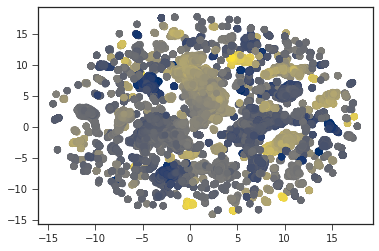

In [21]:
plt.scatter(um_data[::10, 0], um_data[::10, 1], c=cv_arr[::10, 0], cmap="cividis")

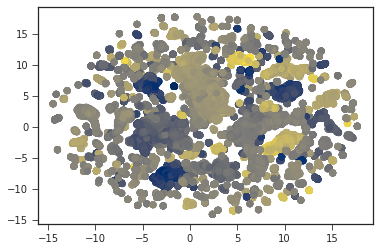

In [22]:
plt.scatter(um_data[::10, 0], um_data[::10, 1], c=cv_arr[::10, 1], cmap="cividis")

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaled_sbs = StandardScaler().fit_transform(data_arr)

In [25]:
reducer2 = umap.UMAP()
reducer2.fit(scaled_sbs[::10])

/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/umap/spectral.py:256: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


UMAP(dens_frac=0.0, dens_lambda=0.0)

In [ ]:
um_data2 = reducer.transform(scaled_sbs)

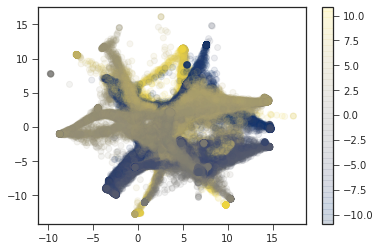

In [31]:
plt.scatter(
    um_data2[::10, 0], um_data2[::10, 1], c=cv_arr[::10, 0], cmap="cividis", alpha=0.1
)
plt.colorbar()

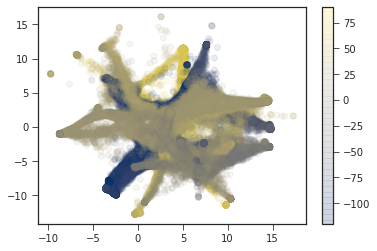

In [32]:
plt.scatter(
    um_data2[::10, 0], um_data2[::10, 1], c=cv_arr[::10, 1], cmap="cividis", alpha=0.1
)
plt.colorbar()